In [ ]:
# USA_Housing

Venture into the ML by learning how one variable can be predicted using several other 
variables through a housing dataset where we will predict the price of houses based on various factor.

In [9]:
# import the basis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
USAHousing=pd.read_csv("USA_Housing.csv")

In [3]:
df=USAHousing.copy()
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
# as per understanding the address has no significant in price prediction

In [5]:
df.drop(["Address"],axis=1,inplace=True)
#df or df2=df.drop(["Address"],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [ ]:
# IQR approach to find outlier
# max limit=Q3+1.5 IQR
# min limit=Q1_1.15 IQR

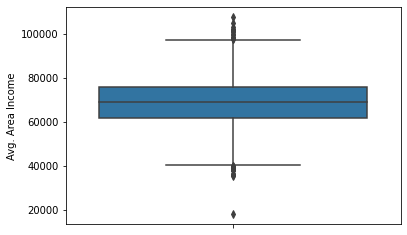

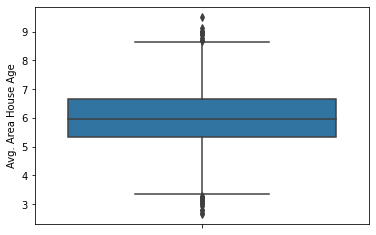

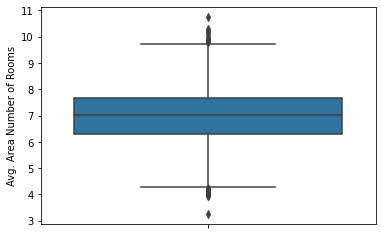

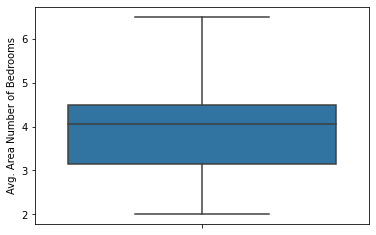

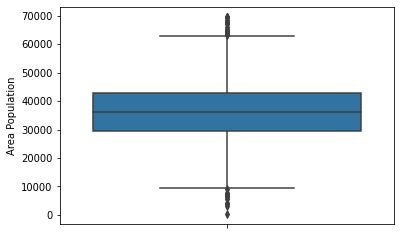

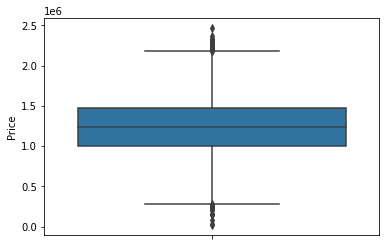

In [10]:
def boxplot(cols):
    sns.boxplot(y=df[cols])
    plt.show()
for i in list(df.columns):
    boxplot(i)

In [12]:
# handling outlier IQR approach
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
max_fence=Q3+1.5*IQR
min_fence=Q1-1.5*IQR
print("Maximum Limit \n",max_fence)
print("Minimum Limit \n" ,min_fence)

Maximum Limit 
 Avg. Area Income                9.723750e+04
Avg. Area House Age             8.643597e+00
Avg. Area Number of Rooms       9.715803e+00
Avg. Area Number of Bedrooms    6.515000e+00
Area Population                 6.304733e+04
Price                           2.181660e+06
dtype: float64
Minimum Limit 
 Avg. Area Income                 40026.397978
Avg. Area House Age                  3.329495
Avg. Area Number of Rooms            4.249318
Avg. Area Number of Bedrooms         1.115000
Area Population                   9217.885595
Price                           287127.530937
dtype: float64


In [13]:
# trimming approach
df1=df[~(df<min_fence)|(df>max_fence).any(axis=1)]
#(~) :- tilda symbol , trim it if as per the condition
#(|):-pipe symbol.  OR 

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4981 non-null   float64
 1   Avg. Area House Age           4985 non-null   float64
 2   Avg. Area Number of Rooms     4987 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               4988 non-null   float64
 5   Price                         4986 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
# Capping approach

In [16]:
df2=np.where(df<min_fence,min_fence, np.where(df>max_fence,max_fence,df))

In [17]:
#df2.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [18]:
df2

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04, 1.05903356e+06],
       [7.92486424e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04, 1.50589092e+06],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04, 1.05898799e+06],
       ...,
       [6.33906869e+04, 7.25059062e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04, 1.03072958e+06],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04, 1.19865687e+06],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04, 1.29895048e+06]])

In [19]:
df2=pd.DataFrame(df2,columns=df.columns)

In [20]:
df2.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


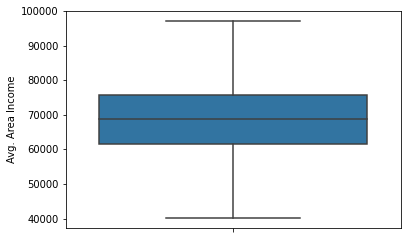

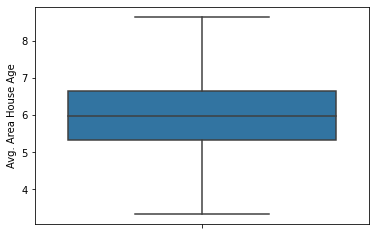

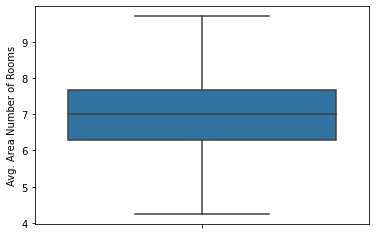

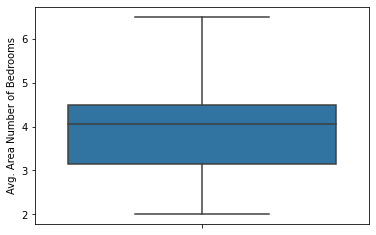

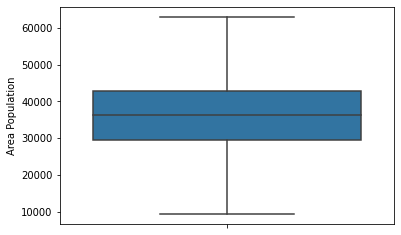

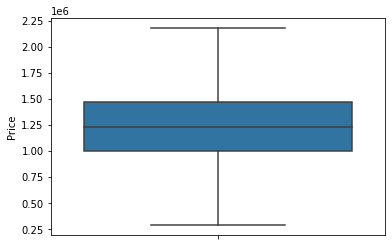

In [21]:
def boxplot(cols):
    sns.boxplot(y=df2[cols])
    plt.show()
for i in list(df2.columns):
    boxplot(i)

In [22]:
df2.shape

(5000, 6)

In [ ]:
# Multivariant analysis

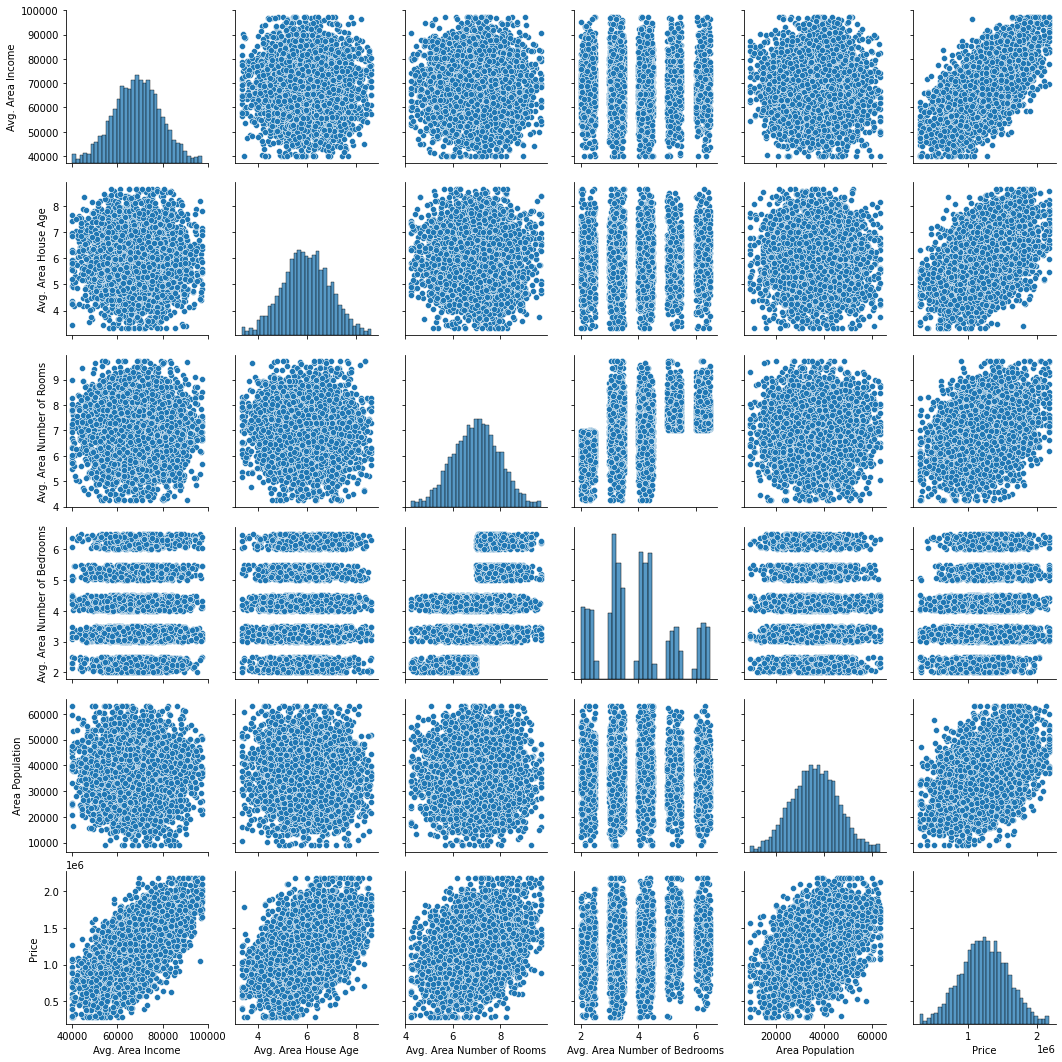

In [23]:
sns.pairplot(df2)

In [ ]:
# univariant 

<AxesSubplot:xlabel='Price', ylabel='Density'>

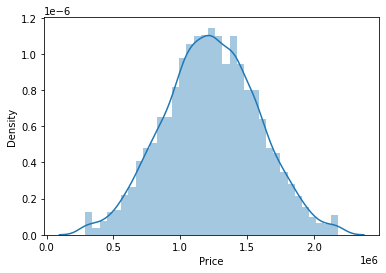

In [24]:
sns.distplot(df2["Price"],kde=True)

In [ ]:
# skewness--- kurtosis value

In [25]:
df2.skew()

Avg. Area Income               -0.023647
Avg. Area House Age            -0.001698
Avg. Area Number of Rooms      -0.045766
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.041218
Price                          -0.005147
dtype: float64

In [26]:
df2.kurt()

Avg. Area Income               -0.134927
Avg. Area House Age            -0.187223
Avg. Area Number of Rooms      -0.174038
Avg. Area Number of Bedrooms   -0.701566
Area Population                -0.161272
Price                          -0.175444
dtype: float64

In [ ]:
# skewness -3 to +3 we can accept as normal dis
#Kurtosis _7 to +7 we can accept as normal dis

In [ ]:
# degree of corr()

In [28]:
corr_matrix=df2.corr()
corr_matrix

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002800,-0.011739,0.019531,-0.014348,0.639078
Avg. Area House Age,-0.002800,1.000000,-0.009748,0.006645,-0.018191,0.452011
Avg. Area Number of Rooms,-0.011739,-0.009748,1.000000,0.463871,0.001400,0.335186
Avg. Area Number of Bedrooms,0.019531,0.006645,0.463871,1.000000,-0.022156,0.171096
Area Population,-0.014348,-0.018191,0.001400,-0.022156,1.000000,0.408916
Price,0.639078,0.452011,0.335186,0.171096,0.408916,1.000000


<AxesSubplot:>

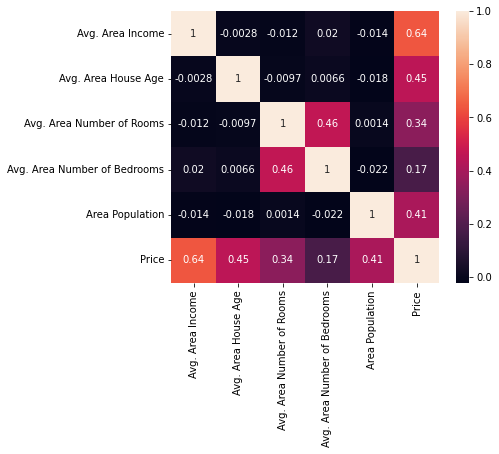

In [31]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix,annot=True)

In [32]:
# creation of independent and dependent variable
X=df2.drop(["Price"],axis=1)
Y=df2["Price"]

In [33]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [ ]:
# feature scaling - to bring all data in one level

In [34]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [35]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [36]:
X_scaled

array([[ 1.0348221 , -0.29854096,  0.0215269 ,  0.08806222, -1.32562204],
       [ 1.00679683,  0.02574693, -0.25635494, -0.72230146,  0.40704855],
       [-0.68912801, -0.11308223,  1.52244502,  0.93084045,  0.07332638],
       ...,
       [-0.49050507,  1.29000432, -2.17873777, -1.50025059, -0.29336339],
       [-0.05516985, -0.44898526,  0.14227176,  1.18205319,  0.65575453],
       [-0.29034543,  0.01501175, -0.19494709,  0.07185495,  1.04877464]])

In [37]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [38]:
X_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.034822,-0.298541,0.021527,0.088062,-1.325622
1,1.006797,0.025747,-0.256355,-0.722301,0.407049
2,-0.689128,-0.113082,1.522445,0.930840,0.073326
3,-0.494796,1.226822,-1.398453,-0.584540,-0.187484
4,-0.812333,-0.949376,0.850279,0.201513,-0.994293


In [ ]:
# X_scaled -- independent Variable
# Y dep variable